## Before using this notebook, please run Distributional_Expectations_Demo_Prep.ipynb

In [49]:
# Dataset from here
# https://archive.ics.uci.edu/ml/datasets/Adult

In [50]:
import great_expectations as gx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

In [51]:
"""
age: continuous.
workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
fnlwgt: continuous.
education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
education-num: continuous.
marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
sex: Female, Male.
capital-gain: continuous.
capital-loss: continuous.
hours-per-week: continuous.
native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
"""
categorical_columns = [
    "workclass",
    "education",
    "marital-status",
    "occupation",
    "relationship",
    "race",
    "sex",
    "native-country",
]
continuous_columns = [
    "age",
    "fnlwgt",
    "education-num",
    "capital-gain",
    "capital-loss",
    "hours-per-week",
]

In [52]:
df = gx.read_csv("../data/adult.data.b_2_train.csv")
df_test = gx.read_csv("../data/adult.data.b_2_test.csv")

df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,<=50k
0,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
1,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
2,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
3,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
4,23,Private,122272,Bachelors,13,Never-married,Adm-clerical,Own-child,White,Female,0,0,30,United-States,<=50K


In [53]:
df.shape

(11277, 15)

In [54]:
df.expect_column_values_to_be_in_set("sex", ["Female", "Male"])

{
  "success": false,
  "meta": {},
  "result": {
    "element_count": 11277,
    "missing_count": 0,
    "missing_percent": 0.0,
    "unexpected_count": 11277,
    "unexpected_percent": 100.0,
    "unexpected_percent_total": 100.0,
    "unexpected_percent_nonmissing": 100.0,
    "partial_unexpected_list": [
      " Female",
      " Female",
      " Female",
      " Female",
      " Female",
      " Male",
      " Female",
      " Female",
      " Female",
      " Male",
      " Male",
      " Male",
      " Female",
      " Male",
      " Male",
      " Female",
      " Male",
      " Female",
      " Female",
      " Female"
    ]
  },
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  }
}

In [55]:
def strip_spaces(df):
    for column in df.columns:
        if isinstance(df[column][0], str):
            df[column] = df[column].apply(str.strip)


strip_spaces(df)
strip_spaces(df_test)

In [56]:
df.expect_column_values_to_be_in_set("sex", ["Female", "Male"])

{
  "success": true,
  "meta": {},
  "result": {
    "element_count": 11277,
    "missing_count": 0,
    "missing_percent": 0.0,
    "unexpected_count": 0,
    "unexpected_percent": 0.0,
    "unexpected_percent_total": 0.0,
    "unexpected_percent_nonmissing": 0.0,
    "partial_unexpected_list": []
  },
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  }
}

In [57]:
df["y"] = df["<=50k"].apply(lambda x: 0 if (x == "<=50K") else 1)
df_test["y"] = df_test["<=50k"].apply(lambda x: 0 if (x == "<=50K") else 1)

<AxesSubplot:>

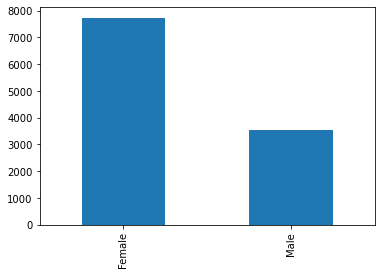

In [58]:
df["sex"].value_counts().plot(kind="bar")

In [59]:
sex_partition = gx.dataset.util.categorical_partition_data(df["sex"])
df.expect_column_chisquare_test_p_value_to_be_greater_than("sex", sex_partition)

{
  "success": true,
  "meta": {},
  "result": {
    "observed_value": 0.9999999999999939,
    "element_count": 11277,
    "missing_count": null,
    "missing_percent": null
  },
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  }
}

In [62]:
df_test.expect_column_chisquare_test_p_value_to_be_greater_than("sex", sex_partition)

{
  "success": true,
  "meta": {},
  "result": {
    "observed_value": 0.3621447645349992,
    "element_count": 2907,
    "missing_count": null,
    "missing_percent": null
  },
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  }
}

(array([2297., 2060., 1958., 2088., 1282.,  823.,  528.,  170.,   53.,
          18.]),
 array([17. , 24.3, 31.6, 38.9, 46.2, 53.5, 60.8, 68.1, 75.4, 82.7, 90. ]),
 <BarContainer object of 10 artists>)

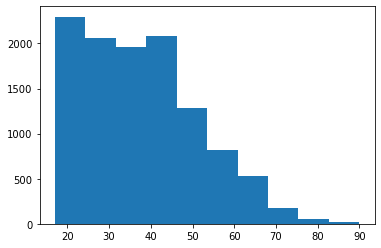

In [63]:
plt.hist(df["age"])

In [64]:
age_partition = gx.dataset.util.continuous_partition_data(df["age"])
df.expect_column_bootstrapped_ks_test_p_value_to_be_greater_than("age", age_partition)

{
  "success": true,
  "meta": {},
  "result": {
    "observed_value": 0.955044955044955,
    "element_count": 11277,
    "missing_count": null,
    "missing_percent": null
  },
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  }
}

In [67]:
out = df_test.expect_column_bootstrapped_ks_test_p_value_to_be_greater_than(
    "age", age_partition
)
print(out)

{
  "expectation_config": {
    "expectation_type": "expect_column_bootstrapped_ks_test_p_value_to_be_greater_than",
    "kwargs": {
      "column": "age",
      "partition_object": {
        "bins": [
          17.0,
          18.871794871794872,
          20.743589743589745,
          22.615384615384613,
          24.48717948717949,
          26.358974358974358,
          28.23076923076923,
          30.102564102564102,
          31.974358974358974,
          33.84615384615385,
          35.717948717948715,
          37.58974358974359,
          39.46153846153846,
          41.33333333333333,
          43.205128205128204,
          45.07692307692308,
          46.94871794871795,
          48.82051282051282,
          50.69230769230769,
          52.56410256410256,
          54.43589743589744,
          56.30769230769231,
          58.17948717948718,
          60.05128205128205,
          61.92307692307692,
          63.794871794871796,
          65.66666666666666,
          67.538461

<AxesSubplot:>

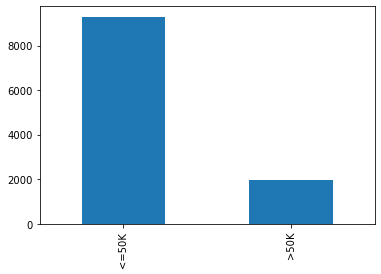

In [75]:
df["<=50k"].value_counts().plot(kind="bar")

<AxesSubplot:>

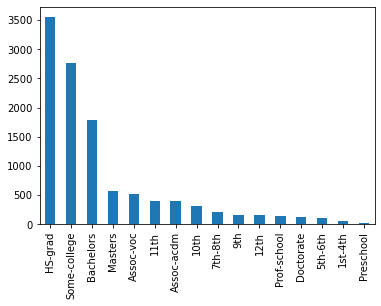

In [76]:
df["education"].value_counts().plot(kind="bar")

In [77]:
education_partition = gx.dataset.util.categorical_partition_data(df["education"])
df.expect_column_chisquare_test_p_value_to_be_greater_than(
    "education", education_partition
)

{
  "success": true,
  "meta": {},
  "result": {
    "observed_value": 1.0,
    "element_count": 11277,
    "missing_count": null,
    "missing_percent": null
  },
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  }
}

{
  "success": true,
  "meta": {},
  "result": {
    "observed_value": 0.7106652126298525,
    "element_count": 2907,
    "missing_count": null,
    "missing_percent": null
  },
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  }
}

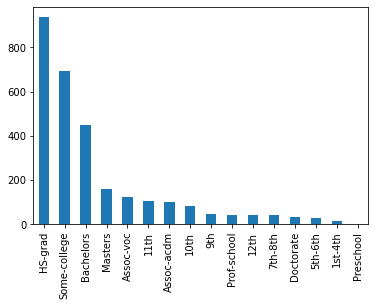

In [78]:
df_test["education"].value_counts().plot(kind="bar")
df_test.expect_column_chisquare_test_p_value_to_be_greater_than(
    "education", education_partition
)

In [79]:
df_test.expect_column_kl_divergence_to_be_less_than(
    "education", education_partition, threshold=0.1
)

{
  "success": true,
  "meta": {},
  "result": {
    "observed_value": 0.0020918978318237927,
    "element_count": 2907,
    "missing_count": null,
    "missing_percent": null
  },
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  }
}

(array([  71.,  105.,  363.,  310.,  560., 3549., 3282.,  397., 2363.,
         277.]),
 array([ 1. ,  2.5,  4. ,  5.5,  7. ,  8.5, 10. , 11.5, 13. , 14.5, 16. ]),
 <BarContainer object of 10 artists>)

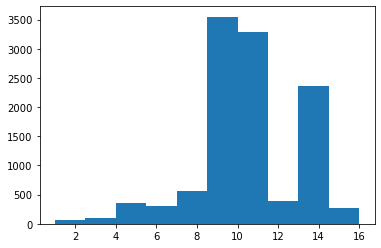

In [80]:
plt.hist(df["education-num"])

In [81]:
education_num_partition_auto = gx.dataset.util.continuous_partition_data(
    df["education-num"]
)
df.expect_column_bootstrapped_ks_test_p_value_to_be_greater_than(
    "education-num", education_num_partition_auto
)

{
  "success": false,
  "meta": {},
  "result": {
    "observed_value": 0.000999000999000999,
    "element_count": 11277,
    "missing_count": null,
    "missing_percent": null
  },
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  }
}

In [82]:
education_num_partition_auto

{'bins': array([ 1.        ,  1.26315789,  1.52631579,  1.78947368,  2.05263158,
         2.31578947,  2.57894737,  2.84210526,  3.10526316,  3.36842105,
         3.63157895,  3.89473684,  4.15789474,  4.42105263,  4.68421053,
         4.94736842,  5.21052632,  5.47368421,  5.73684211,  6.        ,
         6.26315789,  6.52631579,  6.78947368,  7.05263158,  7.31578947,
         7.57894737,  7.84210526,  8.10526316,  8.36842105,  8.63157895,
         8.89473684,  9.15789474,  9.42105263,  9.68421053,  9.94736842,
        10.21052632, 10.47368421, 10.73684211, 11.        , 11.26315789,
        11.52631579, 11.78947368, 12.05263158, 12.31578947, 12.57894737,
        12.84210526, 13.10526316, 13.36842105, 13.63157895, 13.89473684,
        14.15789474, 14.42105263, 14.68421053, 14.94736842, 15.21052632,
        15.47368421, 15.73684211, 16.        ]),
 'weights': array([0.00168485, 0.        , 0.        , 0.00461116, 0.        ,
        0.        , 0.        , 0.00931099, 0.        , 0.   

In [83]:
education_num_partition_cat = gx.dataset.util.categorical_partition_data(
    df["education-num"]
)
df.expect_column_chisquare_test_p_value_to_be_greater_than(
    "education-num", education_num_partition_cat
)

{
  "success": true,
  "meta": {},
  "result": {
    "observed_value": 1.0,
    "element_count": 11277,
    "missing_count": null,
    "missing_percent": null
  },
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  }
}

In [84]:
df_test.expect_column_chisquare_test_p_value_to_be_greater_than(
    "education-num", education_num_partition_cat
)

{
  "success": true,
  "meta": {},
  "result": {
    "observed_value": 0.7106652126298525,
    "element_count": 2907,
    "missing_count": null,
    "missing_percent": null
  },
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  }
}

In [85]:
education_num_partition = gx.dataset.util.continuous_partition_data(
    df["education-num"], bins="uniform", n_bins=10
)
df.expect_column_bootstrapped_ks_test_p_value_to_be_greater_than(
    "education-num", education_num_partition
)

{
  "success": true,
  "meta": {},
  "result": {
    "observed_value": 0.5774225774225774,
    "element_count": 11277,
    "missing_count": null,
    "missing_percent": null
  },
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  }
}

In [86]:
s1 = df["education"][df["y"] == 1].value_counts()
s1.name = "education_y_1"
s2 = df["education"][df["y"] == 0].value_counts()
s2.name = "education_y_0"
plotter = pd.concat([s1, s2], axis=1)

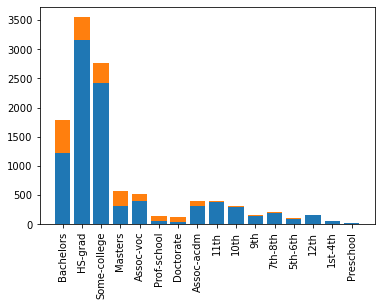

In [87]:
p1 = plt.bar(range(len(plotter)), plotter["education_y_0"])
p2 = plt.bar(
    range(len(plotter)), plotter["education_y_1"], bottom=plotter["education_y_0"]
)

plt.xticks(range(len(plotter)), plotter.index, rotation="vertical")
plt.show()

In [88]:
df.get_expectation_suite()

{
  "expectation_suite_name": "default",
  "data_asset_type": "Dataset",
  "expectations": [
    {
      "expectation_type": "expect_column_values_to_be_in_set",
      "kwargs": {
        "column": "sex",
        "value_set": [
          "Female",
          "Male"
        ]
      },
      "meta": {}
    },
    {
      "expectation_type": "expect_column_chisquare_test_p_value_to_be_greater_than",
      "kwargs": {
        "column": "sex",
        "partition_object": {
          "values": [
            "Female",
            "Male"
          ],
          "weights": [
            0.6859980491265407,
            0.3140019508734593
          ]
        }
      },
      "meta": {}
    },
    {
      "expectation_type": "expect_column_bootstrapped_ks_test_p_value_to_be_greater_than",
      "kwargs": {
        "column": "age",
        "partition_object": {
          "bins": [
            17.0,
            18.871794871794872,
            20.743589743589745,
            22.615384615384613,
       

In [89]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.ensemble import RandomForestClassifier

In [90]:
def build_transformer(df_train):
    le = {}
    ohe = OneHotEncoder()
    X_cat = pd.DataFrame()
    for cat_column in categorical_columns:
        le[cat_column] = LabelEncoder()
        X_cat[cat_column + "_le"] = le[cat_column].fit_transform(df_train[cat_column])
    X_cat = ohe.fit_transform(X_cat)
    X_train = np.append(X_cat.toarray(), df_train[continuous_columns], axis=1)
    return le, ohe, X_train


def apply_transformer(le, ohe, df_test):
    X_cat = pd.DataFrame()
    for cat_column in categorical_columns:
        X_cat[cat_column + "_le"] = le[cat_column].transform(df_test[cat_column])
    X_cat = ohe.transform(X_cat)
    X_test = np.append(X_cat.toarray(), df_test[continuous_columns], axis=1)
    return X_test

In [91]:
clf = RandomForestClassifier()

In [92]:
le, ohe, X_train = build_transformer(df)

In [93]:
clf.fit(X_train, df["y"])

RandomForestClassifier()

In [94]:
clf.score(X_train, df["y"])

0.9999113239336703

In [95]:
my_expectations = df.get_expectation_suite()

In [96]:
my_expectations

{
  "expectation_suite_name": "default",
  "data_asset_type": "Dataset",
  "expectations": [
    {
      "expectation_type": "expect_column_values_to_be_in_set",
      "kwargs": {
        "column": "sex",
        "value_set": [
          "Female",
          "Male"
        ]
      },
      "meta": {}
    },
    {
      "expectation_type": "expect_column_chisquare_test_p_value_to_be_greater_than",
      "kwargs": {
        "column": "sex",
        "partition_object": {
          "values": [
            "Female",
            "Male"
          ],
          "weights": [
            0.6859980491265407,
            0.3140019508734593
          ]
        }
      },
      "meta": {}
    },
    {
      "expectation_type": "expect_column_bootstrapped_ks_test_p_value_to_be_greater_than",
      "kwargs": {
        "column": "age",
        "partition_object": {
          "bins": [
            17.0,
            18.871794871794872,
            20.743589743589745,
            22.615384615384613,
       

In [97]:
results = df_test.validate(expectation_suite=my_expectations)
results

{
  "evaluation_parameters": {},
  "success": true,
  "results": [
    {
      "expectation_config": {
        "expectation_type": "expect_column_values_to_be_in_set",
        "kwargs": {
          "column": "sex",
          "value_set": [
            "Female",
            "Male"
          ]
        },
        "meta": {}
      },
      "success": true,
      "meta": {},
      "result": {
        "element_count": 2907,
        "missing_count": 0,
        "missing_percent": 0.0,
        "unexpected_count": 0,
        "unexpected_percent": 0.0,
        "unexpected_percent_total": 0.0,
        "unexpected_percent_nonmissing": 0.0,
        "partial_unexpected_list": []
      },
      "exception_info": {
        "raised_exception": false,
        "exception_message": null,
        "exception_traceback": null
      }
    },
    {
      "expectation_config": {
        "expectation_type": "expect_column_chisquare_test_p_value_to_be_greater_than",
        "kwargs": {
          "column": "sex",
 

In [98]:
failures = df_test.validate(
    expectation_suite=my_expectations, only_return_failures=True
)
failures

{
  "evaluation_parameters": {},
  "success": true,
  "results": [],
  "meta": {
    "great_expectations_version": "0.14.10",
    "expectation_suite_name": "default",
    "run_id": {
      "run_name": null,
      "run_time": "2022-03-14T15:29:38.061238+00:00"
    },
    "batch_kwargs": {
      "ge_batch_id": "68be2f6c-a3ab-11ec-9787-ba1b7018965e"
    },
    "batch_markers": {},
    "batch_parameters": {},
    "validation_time": "20220314T152938.061214Z",
    "expectation_suite_meta": {
      "great_expectations_version": "0.14.10"
    }
  },
  "statistics": {
    "evaluated_expectations": 6,
    "successful_expectations": 6,
    "unsuccessful_expectations": 0,
    "success_percent": 100.0
  }
}

In [99]:
X_test = apply_transformer(le, ohe, df_test)

In [100]:
clf.score(X_test, df_test["y"])

0.8895768833849329

In [101]:
df_test_2 = gx.read_csv("../data/adult.data.b_1_train.csv")
strip_spaces(df_test_2)
# df_test_2 = df_test_2[df_test_2['native-country'] != 'Holand-Netherlands']
df_test_2["y"] = df_test_2["<=50k"].apply(lambda x: 0 if (x == "<=50K") else 1)
X_test_2 = apply_transformer(le, ohe, df_test_2)

In [102]:
clf.score(X_test_2, df_test_2["y"])

0.8252287938806174

In [103]:
# Health Screening: Preventative Checkup!

In [106]:
failures = df_test_2.validate(my_expectations, only_return_failures=True)
failures

{
  "evaluation_parameters": {},
  "success": false,
  "results": [
    {
      "expectation_config": {
        "expectation_type": "expect_column_chisquare_test_p_value_to_be_greater_than",
        "kwargs": {
          "column": "sex",
          "partition_object": {
            "values": [
              "Female",
              "Male"
            ],
            "weights": [
              0.6859980491265407,
              0.3140019508734593
            ]
          }
        },
        "meta": {}
      },
      "success": false,
      "meta": {},
      "result": {
        "observed_value": 0.0,
        "element_count": 14642,
        "missing_count": null,
        "missing_percent": null
      },
      "exception_info": {
        "raised_exception": false,
        "exception_message": null,
        "exception_traceback": null
      }
    },
    {
      "expectation_config": {
        "expectation_type": "expect_column_chisquare_test_p_value_to_be_greater_than",
        "kwargs": {
    

<AxesSubplot:>

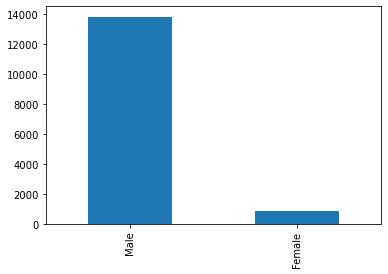

In [107]:
df_test_2["sex"].value_counts().plot(kind="bar")

In [108]:
df_test_3 = gx.read_csv("../data/adult.data.b_1_test.csv")
strip_spaces(df_test_3)
# df_test_3 = df_test_3[df_test_3['native-country'] != 'Holand-Netherlands']
df_test_3["y"] = df_test_3["<=50k"].apply(lambda x: 0 if (x == "<=50K") else 1)
X_test_3 = apply_transformer(le, ohe, df_test_3)

In [109]:
clf.score(X_test_3, df_test_3["y"])

0.8109772423025435

In [110]:
# What could have gone wrong?
#
# a. The world changed.
# b. New sensor means different data.
# c. Bueller? Bueller?
# d. Biased sample of the data

In [112]:
result = df_test_2.validate(my_expectations, only_return_failures=True)
failures

{
  "evaluation_parameters": {},
  "success": false,
  "results": [
    {
      "expectation_config": {
        "expectation_type": "expect_column_chisquare_test_p_value_to_be_greater_than",
        "kwargs": {
          "column": "sex",
          "partition_object": {
            "values": [
              "Female",
              "Male"
            ],
            "weights": [
              0.6859980491265407,
              0.3140019508734593
            ]
          }
        },
        "meta": {}
      },
      "success": false,
      "meta": {},
      "result": {
        "observed_value": 0.0,
        "element_count": 14642,
        "missing_count": null,
        "missing_percent": null
      },
      "exception_info": {
        "raised_exception": false,
        "exception_message": null,
        "exception_traceback": null
      }
    },
    {
      "expectation_config": {
        "expectation_type": "expect_column_chisquare_test_p_value_to_be_greater_than",
        "kwargs": {
    